### 作業
####  目標: 建立一深度學習模型預測客戶是否流失

- 問題一: 請將資料區分為訓練與測試資料集
- 問題二: 請將資料標準化
- 問題三: 使用Keras 建立深度學習模型預測客戶是否流失
- 問題四: 評估模型準確度
- 問題五: 請繪製ROC Curve, 並求出 AUC
- 問題六: 請比較 ANN, SVM, Gradient Boosting, Random Forest, Logist Regression, Decision Tree 各模型的 AUC 與 ROC Curve

In [10]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/Churn_Modelling.csv', header = 0 )
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
# df.iloc[列,欄]
df = df.iloc[:,3:] # 取得所有的列, 只取得第三欄以後所有的資料
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


## 建立機器學習模型前，資料必須是什麼格式：

- 資料必須是結構化資料表 (每一列有相同欄位數, 每個欄位都有自己的格式, 資料呈現方方正正的樣貌)

- 所有的欄位都必須是數值化格式　(FLOAT, INT)

- 所有的資料都必須存在, 沒有遺失值(Missing Value)

#### 資料必須是結構化資料表 (每一列有相同欄位數, 每個欄位都有自己的格式, 資料呈現方方正正的樣貌) 

In [13]:
type(df)

pandas.core.frame.DataFrame

#### 所有的欄位都必須是數值化格式　(FLOAT, INT)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [15]:
df.select_dtypes('object').head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [17]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [19]:
geo = pandas.get_dummies(df['Geography'])
del geo['Spain']
geo.head(3)

,France,Germany
0,1,0
1,0,0
2,1,0


In [20]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [22]:
gender = pandas.get_dummies(df['Gender'])
del gender['Female']
gender.head(3)

,Male
0,0
1,0
2,0


In [24]:
df = pandas.concat([gender, geo, df],axis  = 1)

In [25]:
df.head(3)

,Male,France,Germany,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,1,0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,0,0,0,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,0,1,0,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [26]:
del df['Geography']

In [27]:
del df['Gender']

In [28]:
df.head()

,Male,France,Germany,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,1,0,619,42,2,0.00,1,1,1,101348.88,1
1,0,0,0,608,41,1,83807.86,1,0,1,112542.58,0
2,0,1,0,502,42,8,159660.80,3,1,0,113931.57,1
3,0,1,0,699,39,1,0.00,2,0,0,93826.63,0
4,0,0,0,850,43,2,125510.82,1,1,1,79084.10,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Male               10000 non-null uint8
France             10000 non-null uint8
Germany            10000 non-null uint8
CreditScore        10000 non-null int64
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


#### 所有的資料都必須存在, 沒有遺失值(Missing Value)

In [31]:
df.isna().sum()

Male               0
France             0
Germany            0
CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [35]:
X =  df.iloc[:,:-1]
#X.head()
y =  df.iloc[:,-1]
#y.head()

### 問題一: 請將資料區分為訓練與測試資料集

In [36]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state = 42 )

In [37]:
train_X.shape

(8000, 11)

In [38]:
test_X.shape

(2000, 11)

In [39]:
train_y.shape

(8000,)

In [40]:
test_y.shape

(2000,)

### 問題二: 請將資料標準化

In [41]:
from sklearn.preprocessing import StandardScaler
# (data - mean) / std
sc = StandardScaler()
scaled_X = sc.fit_transform(train_X)

In [44]:
scaled_X[0:3,:]

array([[ 0.91324755,  1.00150113, -0.57946723,  0.35649971, -0.6557859 ,
         0.34567966, -1.21847056,  0.80843615,  0.64920267,  0.97481699,
         1.36766974],
       [ 0.91324755, -0.99850112,  1.72572313, -0.20389777,  0.29493847,
        -0.3483691 ,  0.69683765,  0.80843615,  0.64920267,  0.97481699,
         1.6612541 ],
       [ 0.91324755, -0.99850112, -0.57946723, -0.96147213, -1.41636539,
        -0.69539349,  0.61862909, -0.91668767,  0.64920267, -1.02583358,
        -0.25280688]])

In [42]:
test_X = sc.transform(test_X)

In [45]:
test_X[0:3,:]

array([[ 0.91324755, -0.99850112,  1.72572313, -0.57749609, -0.6557859 ,
        -0.69539349,  0.32993735,  0.80843615, -1.54035103, -1.02583358,
        -1.01960511],
       [ 0.91324755,  1.00150113, -0.57946723, -0.29729735,  0.3900109 ,
        -1.38944225, -1.21847056,  0.80843615,  0.64920267,  0.97481699,
         0.79888291],
       [-1.09499335, -0.99850112, -0.57946723, -0.52560743,  0.48508334,
        -0.3483691 , -1.21847056,  0.80843615,  0.64920267, -1.02583358,
        -0.72797953]])

### 問題三: 使用Keras 建立深度學習模型預測客戶是否流失

In [46]:
import keras

Using TensorFlow backend.


In [47]:
from keras.layers import Dense, Dropout

In [49]:
?Dense

In [70]:
model = keras.Sequential()
model.add(Dense(units = 5, activation='relu',activity_regularizer=, input_shape = (11,) ))
model.add(Dropout(rate=0.1))
model.add(Dense(units = 5, activation='relu' ))
model.add(Dropout(rate=0.1))
model.add(Dense(units = 1, activation='sigmoid' ))

W0831 10:45:12.011343  5152 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [71]:
?model.compile

In [72]:
model.compile('adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [73]:
?model.fit

In [74]:
ck = keras.callbacks.ModelCheckpoint('1.hd5', monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=5)

In [77]:
history = model.fit(scaled_X, train_y,
                    batch_size=32,
                    epochs=10,
                    verbose=1,
                    validation_data=(test_X, test_y),
                    callbacks = [ck])

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 0s 26us/step - loss: 0.3775 - acc: 0.8494 - val_loss: 0.3462 - val_acc: 0.8570
Epoch 2/10
8000/8000 [==============================] - 0s 26us/step - loss: 0.3789 - acc: 0.8458 - val_loss: 0.3458 - val_acc: 0.8575
Epoch 3/10
8000/8000 [==============================] - 0s 25us/step - loss: 0.3801 - acc: 0.8431 - val_loss: 0.3458 - val_acc: 0.8570
Epoch 4/10
8000/8000 [==============================] - 0s 25us/step - loss: 0.3764 - acc: 0.8474 - val_loss: 0.3453 - val_acc: 0.8625
Epoch 5/10
8000/8000 [==============================] - 0s 26us/step - loss: 0.3741 - acc: 0.8474 - val_loss: 0.3456 - val_acc: 0.8600
Epoch 6/10
8000/8000 [==============================] - 0s 28us/step - loss: 0.3756 - acc: 0.8493 - val_loss: 0.3444 - val_acc: 0.8585
Epoch 7/10
8000/8000 [==============================] - 0s 26us/step - loss: 0.3750 - acc: 0.8473 - val_loss: 0.3467 - val_acc: 0.8575
Epoch 8

In [59]:
model.save('churn_predict.hd5')

In [60]:
import keras
model = keras.models.load_model('churn_predict.hd5')

### 問題四: 評估模型準確度

In [84]:
predicted = (model.predict(test_X) > 0.5).flatten() .astype(int)

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y, predicted)

0.858

In [86]:
confusion_matrix(test_y, predicted)

array([[1549,   58],
       [ 226,  167]], dtype=int64)

In [88]:
from sklearn.metrics import classification_report
print(classification_report(test_y, predicted))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1607
           1       0.74      0.42      0.54       393

    accuracy                           0.86      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



### 問題五: 請繪製ROC Curve, 並求出 AUC

In [94]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, threshold = roc_curve(test_y, model.predict(test_X))
auc(fpr, tpr)

0.8561573016272637

Populating the interactive namespace from numpy and matplotlib


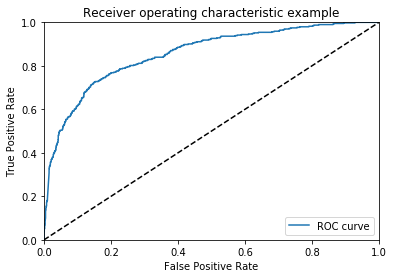

In [95]:
%pylab inline
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 問題六: 請比較 ANN, SVM, Gradient Boosting, Random Forest, Logist Regression, Decision Tree 各模型的 AUC 與 ROC Curve

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(scaled_X, train_y)

clf2 = SVC(probability = True)
clf2.fit(scaled_X, train_y)

clf3 = LogisticRegression()
clf3.fit(scaled_X, train_y)

clf4 = RandomForestClassifier()
clf4.fit(scaled_X, train_y)

clf5 = GradientBoostingClassifier()
clf5.fit(scaled_X, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


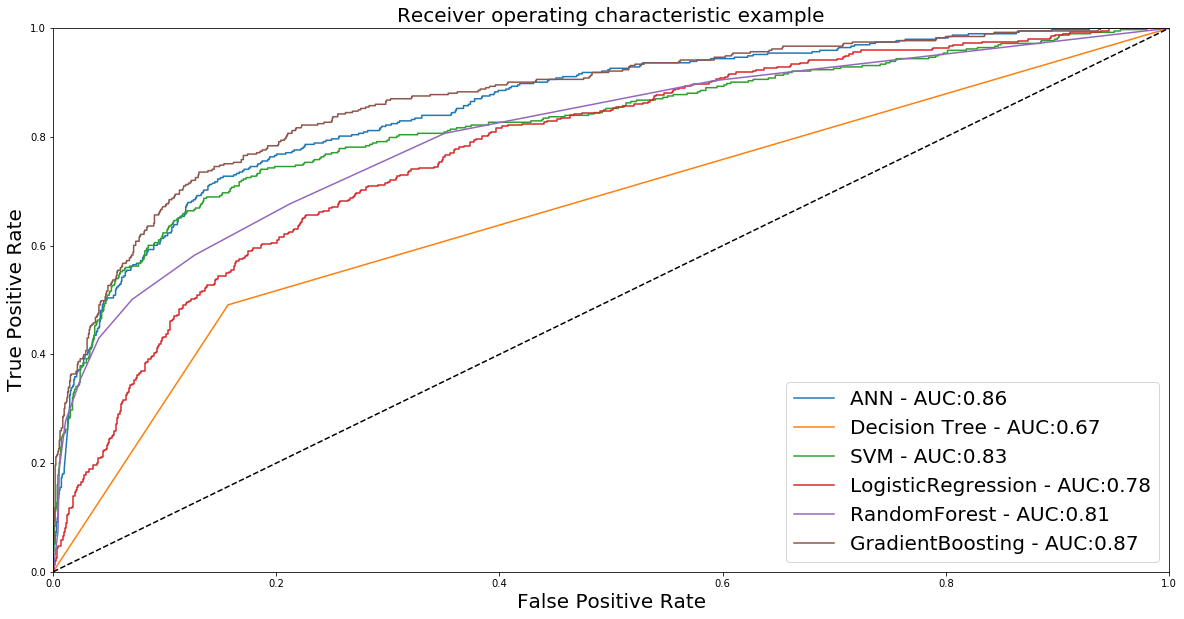

In [96]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize= [20,10])

for clf, title in zip(
    [model,clf1,clf2,clf3, clf4,clf5], 
    ['ANN','Decision Tree','SVM', 'LogisticRegression', 'RandomForest', 'GradientBoosting']):
    if title != 'ANN':
        probas_ = clf.fit(scaled_X, train_y).predict_proba(test_X)
        fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
    else:
        y_pred = clf.predict(test_X)
        fpr, tpr, thresholds = roc_curve(test_y, y_pred)
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

## Gimp
- gimp.org/downloads/

## transform, fit_transform

In [97]:
a= [[50],[60],[70],[80],[90]]
b= [[80],[85],[90]]
import numpy
na = numpy.array(a)
nb = numpy.array(b)

In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
s = sc.fit(na)

In [100]:
s.mean_

array([70.])

In [101]:
s.var_

array([200.])

In [102]:
sc.fit_transform(na)

array([[-1.41421356],
       [-0.70710678],
       [ 0.        ],
       [ 0.70710678],
       [ 1.41421356]])

In [103]:
sc.transform(nb)

array([[0.70710678],
       [1.06066017],
       [1.41421356]])

## 建立卷積神經網路來辨識手寫數字

### 引用Keras

In [104]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Conv2D, MaxPooling2D

### 讀取MNIST 數據

In [105]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [106]:
x_train.shape

(60000, 28, 28)

In [107]:
x_test.shape

(10000, 28, 28)

In [108]:
y_train.shape

(60000,)

In [109]:
y_test.shape

(10000,)

In [110]:
x_train = x_train.reshape(60000, 28,28,1) #(圖片張數, 圖片長, 圖片寬, 顏色channel)
x_test  = x_test.reshape(10000, 28,28,1) #(圖片張數, 圖片長, 圖片寬, 顏色channel)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

In [111]:
y_train[0]

5

In [112]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test, n_classes)

In [113]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### 建立卷積神經網路

In [114]:
n_hidden_1 = 256
n_hidden_2 = 256 
training_epochs = 15
batch_size = 100

In [115]:
model = keras.Sequential()

model.add(Conv2D(
            filters=16,
            kernel_size = (3,3),
            padding = 'same',
            input_shape = (28,28,1), 
            activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(n_hidden_1, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

W0831 12:11:25.894482  5152 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [116]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               803072    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 805,802
Trainable params: 805,802
Non-trainable params: 0
_________________________________________________________________


In [117]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [118]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 18s 303us/step - loss: 0.2255 - acc: 0.9329 - val_loss: 0.1024 - val_acc: 0.9689
Epoch 2/15
60000/60000 [==============================] - 18s 297us/step - loss: 0.0770 - acc: 0.9772 - val_loss: 0.0656 - val_acc: 0.9786
Epoch 3/15
60000/60000 [==============================] - 18s 297us/step - loss: 0.0478 - acc: 0.9854 - val_loss: 0.0503 - val_acc: 0.9839
Epoch 4/15
60000/60000 [==============================] - 17s 290us/step - loss: 0.0350 - acc: 0.9894 - val_loss: 0.0480 - val_acc: 0.9836
Epoch 5/15
60000/60000 [==============================] - 18s 298us/step - loss: 0.0242 - acc: 0.9930 - val_loss: 0.0392 - val_acc: 0.9868
Epoch 6/15
60000/60000 [==============================] - 17s 276us/step - loss: 0.0187 - acc: 0.9941 - val_loss: 0.0444 - val_acc: 0.9859
Epoch 7/15
60000/60000 [==============================] - 16s 272us/step - loss: 0.0132 - acc: 0.9959 - val_loss: 0.

In [122]:
import numpy
predicted = numpy.argmax(model.predict(x_test), axis = 1)

In [125]:
answer = numpy.argmax(y_test, axis = 1)

In [126]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(answer, predicted)

0.9886

In [127]:
confusion_matrix(answer, predicted)

array([[ 973,    1,    2,    1,    0,    0,    2,    0,    0,    1],
       [   0, 1127,    3,    0,    0,    0,    3,    1,    1,    0],
       [   0,    2, 1021,    1,    1,    0,    1,    4,    2,    0],
       [   0,    0,    3, 1002,    0,    2,    0,    0,    2,    1],
       [   0,    0,    0,    0,  977,    0,    0,    0,    1,    4],
       [   1,    0,    0,    8,    0,  879,    3,    0,    1,    0],
       [   5,    3,    0,    0,    1,    2,  946,    0,    1,    0],
       [   0,    2,    5,    3,    0,    0,    0, 1016,    1,    1],
       [   2,    1,    2,    3,    0,    1,    0,    1,  960,    4],
       [   1,    2,    1,    4,    8,    3,    0,    3,    2,  985]],
      dtype=int64)

In [138]:
from PIL import Image
img = Image.open('4.jpg').convert('L')
img

In [139]:
imgary = (255 - np.array(img)) / 255

In [140]:
imgary.shape

(28, 28)

In [141]:
imgary2 = imgary.reshape(28,28,1)

In [142]:
imgary2.shape

(28, 28, 1)

In [143]:
imgary3 = np.expand_dims(imgary2, axis = 0)

In [144]:
imgary3.shape

(1, 28, 28, 1)

In [145]:
np.argmax(model.predict(imgary3))

4

## [實例] 利用卷積神經網路辨識圖片

### 自己寫爬蟲

In [3]:
import requests
from bs4 import BeautifulSoup
google_url = 'https://www.google.com/search?ei=gAhqXciWMbCSr7wPgLaqiAE&yv=3&tbm=isch&q={}&vet=10ahUKEwjI1v2Bs6zkAhUwyYsBHQCbChEQuT0IWygB.gAhqXciWMbCSr7wPgLaqiAE.i&ved=0ahUKEwjI1v2Bs6zkAhUwyYsBHQCbChEQuT0IWygB&ijn=1&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_jsfs:Ffpdje,_fmt:pc'
res = requests.get(google_url.format('周子瑜', 0))
soup = BeautifulSoup(res.text, 'lxml' )

In [11]:
for alink in soup.select('a img'):
    if alink.get('src'):
        print(alink.get('src'))
        print('======================')

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSusiRDen63kpJt1tKfPRrrohK1O06dKpMw7vqn4mKC0I7d7SrVyQ
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR8vQgndPe1a-ENKD16Q_qItZbj58at5oQu_x8f6MFwbSF8Gy6u
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQLj8QNjvWyzBVLrBJ8RYZFCnq-ueBQ6-HN2uv50Nr23ojWIoeFOg
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ4tJeNm9SPJSrq_6o6Fk9PpkXv0oOa23VZV7OC7-9jcSPkfFaYXg
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSUKuniCIq_bcdxjYl73miKP3sYBdEbXV21iimjmM_5AiqjgIrGog
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQlsIyQqFJA3BfrtGesXk3OEF339r-a36JeZCCaDqG3_6qK_DOV
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRlPzcL8oZPRCRxp-GO4XnapE4gy7s2O12bhmL3ihctYSKjXVc9Ag
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQpz161DMx7_8FlK7bHsFElEZqzkv_ep7GkzmXHS3_K-7aLHC5z2w
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ8WAobvi9cqAQS-tGxzyyw3mXIyhakelIoMWrhkr9XFILj7voF
https://encrypted-tbn0.gstatic.com/images?q

In [13]:
res = requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSusiRDen63kpJt1tKfPRrrohK1O06dKpMw7vqn4mKC0I7d7SrVyQ')
with open('1.jpg' , 'wb') as f:
    f.write(res.content)

In [18]:
def getPicture(path, url):
    res = requests.get(url)
    with open('{}/{}.jpg'.format(path, url.split('tbn:')[1]) , 'wb') as f:
        f.write(res.content)

In [20]:
getPicture('zhiyu','https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQWH_aMTZOkNXT6NK7WwBP_0OgA5Ugv34HT0t-pNoUannRIj0IM1A')

In [24]:
import requests
import os
from bs4 import BeautifulSoup
google_url = 'https://www.google.com/search?ei=gAhqXciWMbCSr7wPgLaqiAE&yv=3&tbm=isch&q={}&vet=10ahUKEwjI1v2Bs6zkAhUwyYsBHQCbChEQuT0IWygB.gAhqXciWMbCSr7wPgLaqiAE.i&ved=0ahUKEwjI1v2Bs6zkAhUwyYsBHQCbChEQuT0IWygB&ijn=1&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_jsfs:Ffpdje,_fmt:pc'

def getIdolImage(path, term, pagenum):
    if not os.path.exists(path):
        os.mkdir(path)
    for p in range(pagenum):
        res = requests.get(google_url.format(term, p* 100))
        soup = BeautifulSoup(res.text, 'lxml' )
        for alink in soup.select('a img'):
            if alink.get('src'):
                getPicture(path, alink.get('src'))

In [26]:
getIdolImage('zhiyu','周子瑜', 5)

In [27]:
getIdolImage('chilin','林志玲', 5)

In [28]:
getIdolImage('puff','郭雪芙', 5)

### google_images_download

In [29]:
! pip install google_images_download

  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\1f\28\ad\f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [30]:
from google_images_download import google_images_download 
response = google_images_download.googleimagesdownload()   
arguments = {"keywords":"北極熊","limit":20,"print_urls":True}   
paths = response.download(arguments) 


Item no.: 1 --> Item name = \u5317\u6975\u718a
Evaluating...
Starting Download...
Image URL: https://www.natgeomedia.com/wp-content/uploads/2018/08/explore-through-the-lens-polar-bear.adapt_.885.1-801x1024.jpg
Completed Image ====> 1.explore-through-the-lens-polar-bear.adapt_.885.1-801x1024.jpg
Image URL: https://images.chinatimes.com/newsphoto/2019-07-29/900/20190729003677.jpg
Completed Image ====> 2.20190729003677.jpg
Image URL: https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Polar_Bear_ANWR_1.jpg/300px-Polar_Bear_ANWR_1.jpg
Completed Image ====> 3.300px-Polar_Bear_ANWR_1.jpg
Image URL: http://taiwanbear.org.tw/admin/resource/images/f5cec8c65ae27a.jpeg
Completed Image ====> 4.f5cec8c65ae27a.jpeg
Image URL: https://cw1.tw/CW/images/article/201704/article-58f87f1924ef8.jpg
Completed Image ====> 5.article-58f87f1924ef8.jpg
Image URL: https://cdn2.ettoday.net/images/3846/d3846148.jpg
Completed Image ====> 6.d3846148.jpg
Image URL: http://www.hkedcity.net/cms_files/cms-funpost/

### 使用OpenCV 擷取人臉部分
- https://www.lfd.uci.edu/~gohlke/pythonlibs/
- opencv_python‑3.4.7‑cp37‑cp37m‑win_amd64.whl
- https://download.lfd.uci.edu/pythonlibs/r3aykn4w/opencv_python-3.4.7-cp37-cp37m-win_amd64.whl

In [31]:
! pip install C:/Users/user/Downloads/opencv_python-3.4.7-cp37-cp37m-win_amd64.whl

Processing c:\users\user\downloads\opencv_python-3.4.7-cp37-cp37m-win_amd64.whl


In [32]:
import cv2 as cv

### Haar cascade
https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

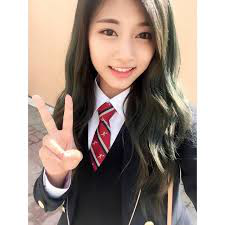

In [34]:
from PIL import Image
im = Image.open('zhiyu/ANd9GcQcLKvlkOVQaeeoIq95TvEoxS307xBVfrXtbRsU4ylcydLoa5RT.jpg')
im

In [35]:
import cv2 as cv
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv.imread('zhiyu/ANd9GcQcLKvlkOVQaeeoIq95TvEoxS307xBVfrXtbRsU4ylcydLoa5RT.jpg')
img.shape

(225, 225, 3)

In [36]:
?face_cascade.detectMultiScale

In [37]:
faces = face_cascade.detectMultiScale(img, 1.3, 5)

In [38]:
faces

array([[81,  6, 84, 84]], dtype=int32)

In [39]:
x,y,w,h = faces[0]

In [40]:
box = (x, y, x+w, y+h)

In [41]:
crpim = im.crop(box).resize((64,64))

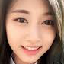

In [42]:
crpim

In [43]:
src  = 'zhiyu/'
dest = 'zhiyu_face/'

if not os.path.exists(dest):
    os.mkdir(dest)
    
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

for filename in os.listdir(src):
    img = cv.imread(src + filename)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    if len(faces) == 1:
        im      = Image.open(src + filename)
        x,y,w,h = faces[0]
        box     = (x, y, x+w, y+h)
        crpim   = im.crop(box).resize((64,64))
        crpim.save(dest + filename)

In [44]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

def cropIdolFace(src, dest):
    if not os.path.exists(dest):
        os.mkdir(dest)
    for filename in os.listdir(src):
        img = cv.imread(src + filename)
        faces = face_cascade.detectMultiScale(img, 1.3, 5)
        if len(faces) == 1:
            im      = Image.open(src + filename)
            x,y,w,h = faces[0]
            box     = (x, y, x+w, y+h)
            crpim   = im.crop(box).resize((64,64))
            crpim.save(dest + filename)

In [45]:
cropIdolFace('zhiyu/', 'zhiyu_face/')

In [46]:
cropIdolFace('chilin/', 'chilin_face/')

In [47]:
cropIdolFace('puff/', 'puff_face/')

### face_recognition

In [ ]:
! pip install face_recognition

In [ ]:
import face_recognition
image = face_recognition.load_image_file('zhiyu/ANd9GcQcLKvlkOVQaeeoIq95TvEoxS307xBVfrXtbRsU4ylcydLoa5RT.jpg')
face_locations = face_recognition.face_locations(image)
face_locations

### 使用 CNN 建立人臉識別模型

In [19]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64,
3), activation = 'relu',padding = 'same'))
# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu',padding = 'same'))
# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Fully Connected
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dropout(rate=0.1)) 
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dropout(rate=0.1)) 
classifier.add(Dense(units = 3, activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                        loss ='categorical_crossentropy', 
                     metrics = ['accuracy'])

In [20]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
__________

### 圖像增廣技術

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,     #x坐标保持不变，而对应的y坐标按比例发生平移
                                   zoom_range = 0.2,      #可以让图片在长或宽的方向进行放大
                                   horizontal_flip = True #水平翻转操作
                                  )

In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)

### 將資料分為訓練與測試資料集

In [9]:
import os
if not os.path.exists('train/'):
    os.mkdir('train/')
if not os.path.exists('test/'):
    os.mkdir('test/')

In [10]:
import os
len(list(os.listdir('chilin_face/')))
dataset = list(os.listdir('chilin_face/'))

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(dataset, test_size= 0.2, random_state = 42)

In [11]:
if not os.path.exists('train/chilin_face/'):
    os.mkdir('train/chilin_face/')
if not os.path.exists('test/chilin_face/'):
    os.mkdir('test/chilin_face/')
    
for f in train_data:
    os.rename('chilin_face/' + f, 'train/chilin_face/' + f)
for f in test_data:
    os.rename('chilin_face/' + f, 'test/chilin_face/' + f)

In [12]:
import os
from sklearn.model_selection import train_test_split

def splitDataset(dirs):
    dataset = list(os.listdir(dirs))
    train_data, test_data = train_test_split(dataset, test_size= 0.2, random_state = 42)
    
    if not os.path.exists('train/'+dirs):
        os.mkdir('train/'+dirs)
    if not os.path.exists('test/'+dirs):
        os.mkdir('test/'+dirs)

    for f in train_data:
        os.rename(dirs + f, 'train/'+ dirs + f)
    for f in test_data:
        os.rename(dirs + f, 'test/' + dirs +f)

In [13]:
splitDataset('puff_face/')

In [14]:
splitDataset('zhiyu_face/')

In [15]:
training_set = train_datagen.flow_from_directory(
    'train/', target_size = (64, 64),
     batch_size = 16,
     class_mode = 'categorical')

Found 118 images belonging to 3 classes.


In [16]:
test_set = test_datagen.flow_from_directory(
    'test/', target_size = (64, 64),
    batch_size = 30, 
    class_mode = 'categorical')

Found 31 images belonging to 3 classes.


### 訓練神經網路

In [22]:
history = classifier.fit_generator(training_set,
                         nb_epoch=10,
                         nb_val_samples=16,
                         steps_per_epoch = 10,
                         verbose = 1,
                         validation_data = test_set)

Epoch 1/10
 2/10 [=====>........................] - ETA: 0s - loss: 0.6112 - acc: 0.6875

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=10, verbose=1, validation_data=<keras_pre..., epochs=10, validation_steps=16)`
  


10/10 [==============================] - 1s 82ms/step - loss: 0.6291 - acc: 0.7295 - val_loss: 0.8156 - val_acc: 0.7056
Epoch 2/10
10/10 [==============================] - 1s 77ms/step - loss: 0.7191 - acc: 0.7373 - val_loss: 0.7728 - val_acc: 0.6774
Epoch 3/10
10/10 [==============================] - 1s 79ms/step - loss: 0.6759 - acc: 0.7044 - val_loss: 0.7111 - val_acc: 0.7742
Epoch 4/10
10/10 [==============================] - 1s 80ms/step - loss: 0.6659 - acc: 0.7107 - val_loss: 0.7418 - val_acc: 0.7097
Epoch 5/10
10/10 [==============================] - 1s 78ms/step - loss: 0.7940 - acc: 0.6886 - val_loss: 0.6883 - val_acc: 0.7742
Epoch 6/10
10/10 [==============================] - 1s 79ms/step - loss: 0.6427 - acc: 0.7785 - val_loss: 0.7556 - val_acc: 0.7137
Epoch 7/10
10/10 [==============================] - 1s 82ms/step - loss: 0.5606 - acc: 0.7956 - val_loss: 0.5977 - val_acc: 0.8024
Epoch 8/10
10/10 [==============================] - 1s 79ms/step - loss: 0.5673 - acc: 0.7924 

### 使用模型分類圖片

In [128]:
import cv2 as cv
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv.imread('predicted.png')
img.shape

(317, 272, 3)

In [129]:
faces = face_cascade.detectMultiScale(img, 1.3, 3)

In [130]:
faces

array([[ 36,  78, 102, 102],
       [ 49, 163,  74,  74]], dtype=int32)

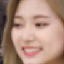

In [131]:
from PIL import Image
im = Image.open('predicted.png')
x,y,w,h = faces[0]
box     = (x, y, x+w, y+h)
crpim   = im.crop(box).resize((64,64))
crpim

In [132]:
crpim.save('predict_face.jpg')

In [133]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('predict_face.jpg', target_size= (64,64))
test_image = image.img_to_array(test_image)
test_image.shape

(64, 64, 3)

In [134]:
#test_image

In [135]:
test_image = np.expand_dims(test_image, axis = 0)
test_image.shape

(1, 64, 64, 3)

In [136]:
classifier.predict_classes(test_image)

array([2], dtype=int64)

In [137]:
training_set.class_indices

{'chilin_face': 0, 'puff_face': 1, 'zhiyu_face': 2}

In [138]:
dic = {}
for k in training_set.class_indices:
    dic[training_set.class_indices[k]] = k

In [139]:
dic.get(classifier.predict_classes(test_image)[0])

'zhiyu_face'

## 使用遞歸神經網路預測股票

### 使用Pandas DataReader

In [140]:
! pip install pandas-datareader

In [141]:
import pandas_datareader
dataset = pandas_datareader.get_data_yahoo('2330.TW')

In [143]:
dataset.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-26,250.5,248.5,249.0,248.5,31678620.0,248.5
2019-08-27,251.0,248.5,250.5,250.0,50234951.0,250.0
2019-08-28,253.0,250.5,250.5,252.0,15132882.0,252.0
2019-08-29,254.0,251.0,253.0,254.0,19587767.0,254.0
2019-08-30,259.0,256.0,256.5,259.0,35184201.0,259.0


Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['box', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


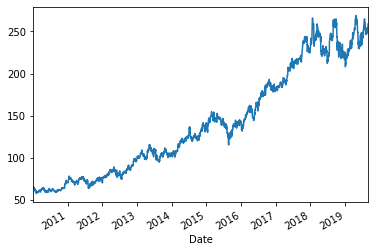

In [144]:
%pylab inline
dataset['Close'].plot(kind = 'line')

In [145]:
len(dataset)

2373

In [146]:
len(dataset) * 0.8

1898.4

In [147]:
trainset = dataset.iloc[0:1900,3].values

In [152]:
#trainset

In [149]:
testset = dataset.iloc[1900:,3].values

In [151]:
#testset

In [153]:
trainset.max()

221.5

In [154]:
trainset.min()

57.20000076293945

In [159]:
a  = numpy.array([1,2,3,4,5])
a.reshape(-1,1)

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [156]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(trainset.reshape(-1,1))

In [157]:
training_set_scaled

array([[0.04686549],
       [0.04443091],
       [0.04686549],
       ...,
       [0.98782715],
       [1.        ],
       [1.        ]])

In [160]:
import numpy as np
X_train = []
y_train = []
for i in range(60, 1900):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [161]:
X_train.shape

(1840, 60)

In [162]:
y_train.shape

(1840,)

In [163]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [164]:
X_train.shape

(1840, 60, 1)

In [165]:
# Importing the Keras libraries and packages
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [166]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_11 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
__________

In [167]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
1840/1840 [==============================] - 6s 3ms/step - loss: 0.0264
Epoch 2/10
1840/1840 [==============================] - 4s 2ms/step - loss: 0.0034
Epoch 3/10
1840/1840 [==============================] - 4s 2ms/step - loss: 0.0027
Epoch 4/10
1840/1840 [==============================] - 4s 2ms/step - loss: 0.0024
Epoch 5/10
1840/1840 [==============================] - 4s 2ms/step - loss: 0.0024
Epoch 6/10
1840/1840 [==============================] - 4s 2ms/step - loss: 0.0025
Epoch 7/10
1840/1840 [==============================] - 5s 3ms/step - loss: 0.0026
Epoch 8/10
1840/1840 [==============================] - 5s 3ms/step - loss: 0.0026
Epoch 9/10
1840/1840 [==============================] - 6s 3ms/step - loss: 0.0021
Epoch 10/10
1840/1840 [==============================] - 6s 3ms/step - loss: 0.0022


In [169]:
test_set_scaled = sc.transform(testset.reshape(-1,1))

In [171]:
#test_set_scaled

In [172]:
len(test_set_scaled)

473

In [173]:
import numpy as np
X_test = []
y_test = []
for i in range(60, 473):
    X_test.append(test_set_scaled[i-60:i, 0])
    y_test.append(test_set_scaled[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [174]:
X_test.shape

(413, 60)

In [175]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [176]:
X_test.shape

(413, 60, 1)

In [177]:
predicted = regressor.predict(X_test)

In [179]:
#predicted

In [180]:
predicted = sc.inverse_transform(predicted)

In [182]:
#predicted

In [185]:
predicted = predicted.flatten()

In [187]:
#y_test

In [189]:
len(predicted)

413

In [195]:
stockprice = sc.inverse_transform(y_test.reshape(-1,1)).flatten()

In [196]:
len(stockprice)

413

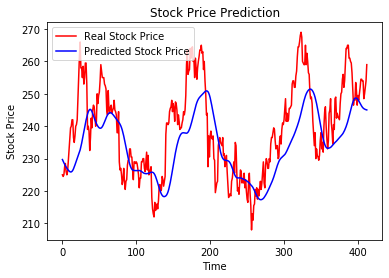

In [200]:
import matplotlib.pyplot as plt
plt.plot(stockprice, color = 'red', label = 'Real Stock Price')
plt.plot(predicted, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [201]:
(265 - 235) /235

0.1276595744680851

In [202]:
predicted2 = regressor.predict(X_train)

In [203]:
predicted2 = sc.inverse_transform(predicted2)

In [204]:
y_train = y_train.reshape((-1,1))

In [205]:
stockprice2 = sc.inverse_transform(y_train)

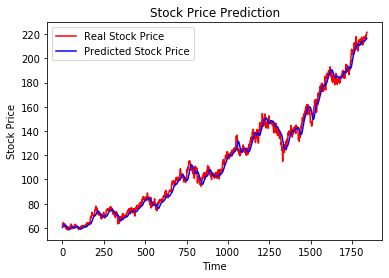

In [206]:
import matplotlib.pyplot as plt
plt.plot(stockprice2, color = 'red', label = 'Real Stock Price')
plt.plot(predicted2, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## 讓電腦創作

In [207]:
import keras
import numpy as np

path = keras.utils.get_file(
    'nietzsche.txt',
    origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
text = open(path, encoding='utf-8').read().lower()
print('Corpus length:', len(text))

606208/600901 [==============================] - 1s 2us/step
Corpus length: 600893


In [208]:
s = 'this is an apple'
maxlen = 5
step = 3
sentences, next_chars= [],[]
for i in range(0, len(s) - maxlen, step):
    sentences.append(s[i: i + maxlen])
    next_chars.append(s[i + maxlen])
for i, j in zip(sentences, next_chars):
    print(i,j)

this  i
s is  a
s an  a
n app l


In [209]:
# Vectorizing sequences of characters

# 從文章中取得序列長度
maxlen = 60

# 按步驟數進行隨機採樣
step = 3

# 保留句子的序列
sentences = []

# 保留下一個字元
next_chars = []

for i in range(0, len(text) - maxlen, step):
    # 根據step，每次取出 maxlen 的序列為 train data
    sentences.append(text[i: i + maxlen])
    # 取出序列的下一個字元當 targets
    next_chars.append(text[i + maxlen])
    
print('Number of sequences:', len(sentences))

Number of sequences: 200278


In [210]:
# 產生詞彙表
chars = sorted(list(set(text)))
print('Unique characters:', len(chars))

Unique characters: 57


In [211]:
print(chars)

['\n', ' ', '!', '"', "'", '(', ')', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'ä', 'æ', 'é', 'ë']


In [212]:
# 利用字典對映 char 和索引 index
char_indices = dict((char, chars.index(char)) for char in chars)
print(char_indices)

{'\n': 0, ' ': 1, '!': 2, '"': 3, "'": 4, '(': 5, ')': 6, ',': 7, '-': 8, '.': 9, '0': 10, '1': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18, '9': 19, ':': 20, ';': 21, '=': 22, '?': 23, '[': 24, ']': 25, '_': 26, 'a': 27, 'b': 28, 'c': 29, 'd': 30, 'e': 31, 'f': 32, 'g': 33, 'h': 34, 'i': 35, 'j': 36, 'k': 37, 'l': 38, 'm': 39, 'n': 40, 'o': 41, 'p': 42, 'q': 43, 'r': 44, 's': 45, 't': 46, 'u': 47, 'v': 48, 'w': 49, 'x': 50, 'y': 51, 'z': 52, 'ä': 53, 'æ': 54, 'é': 55, 'ë': 56}


In [213]:
# 使用one-hot 編碼
# x：訓練樣本
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
# y：目標樣本
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)

In [215]:
for i, sentence in enumerate(sentences):        # 對每個句子
    for t, char in enumerate(sentence):         # 對每個詞
        x[i, t, char_indices[char]] = 1         # 將訓練樣本做one-hot
    y[i, char_indices[next_chars[i]]] = 1       # 將標籤做one-hot

In [216]:
y.shape

(200278, 57)

In [217]:
x.shape

(200278, 60, 57)

In [ ]:
# 使用 LSTM 做下一個字元的預測

from keras import layers

model = keras.models.Sequential()
# 輸入為60 * 字串長度
model.add(layers.LSTM(128, return_sequences=True, input_shape=(maxlen, len(chars))))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.LSTM(128))
# 以字元對應作為輸出
model.add(layers.Dense(len(chars), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
model.fit(x, y, batch_size=1024, epochs=1)

## 讓電腦自動評論餐廳
### 使用Yelp 模型
- https://github.com/Tony607/Yelp_review_generation/releases/download/V0.1/pre-trained.hdf5

In [218]:
import keras
from keras import layers
import sys
import numpy as np

text= 'this text file can be any text, as long as it contains text longer than maxlen defined below'

chars=['\n', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~']

In [219]:
len(chars)

95

In [226]:
# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)
maxlen=60
step=1

In [227]:
model = keras.models.Sequential()
model.add(layers.LSTM(1024, input_shape=(maxlen, len(chars)),return_sequences=True))
model.add(layers.LSTM(1024, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))
model.load_weights("pre-trained.hdf5")

optimizer = keras.optimizers.Adam(lr=0.0002)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [228]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 60, 1024)          4587520   
_________________________________________________________________
lstm_8 (LSTM)                (None, 1024)              8392704   
_________________________________________________________________
dense_15 (Dense)             (None, 95)                97375     
Total params: 13,077,599
Trainable params: 13,077,599
Non-trainable params: 0
_________________________________________________________________


In [229]:
text='this text file can be any text, as long as it contains text longer than maxlen defined below'
generated_text = text[0:60]

In [230]:
sampled = np.zeros((1, maxlen, len(chars)))
for t, char in enumerate(generated_text):
    sampled[0, t, char_indices[char]] = 1
    
preds = model.predict(sampled, verbose=0)[0]

In [231]:
preds

array([6.54708818e-13, 4.91883513e-03, 8.25364841e-04, 1.46944367e-04,
       1.26869435e-11, 6.32761567e-06, 2.35632375e-10, 1.71234151e-05,
       4.95391025e-04, 2.79165106e-05, 8.28657212e-05, 1.02266810e-07,
       5.43095695e-04, 6.40538812e-04, 1.39632099e-03, 1.14295712e-04,
       5.06943798e-05, 1.30276359e-03, 1.63714329e-04, 1.31604938e-05,
       4.66580241e-06, 3.35126570e-05, 2.28567956e-06, 2.41786393e-06,
       9.57904376e-07, 4.89776448e-06, 3.67903849e-05, 1.60913385e-06,
       1.48880674e-04, 6.61761770e-14, 1.59736599e-11, 8.13017177e-05,
       8.47771089e-11, 5.54972285e-05, 9.57039592e-05, 2.05161632e-04,
       7.59295745e-06, 3.85530475e-05, 4.58274553e-06, 3.42778912e-05,
       1.10366100e-05, 6.54659700e-04, 1.02783224e-06, 2.17483580e-06,
       2.02383872e-05, 1.67124104e-04, 1.53595229e-05, 3.74993397e-05,
       2.48534343e-05, 9.44790565e-11, 2.67035412e-05, 3.15956822e-05,
       8.48811615e-05, 2.40589611e-06, 7.90417762e-05, 1.59974809e-06,
      

In [232]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [233]:
def random_reviews():
    # sample a start index
    start_index = np.random.randint(0, len(text) - maxlen - 1)
    # the initial sampled text with maxlen long
    generated_text = text[start_index: start_index + maxlen]
    print('Coming up with several reviews for you...')

    for temperature in [0.8]:
        sys.stdout.write(generated_text)

        # We generate 600 characters
        for i in range(600):
            sampled = np.zeros((1, maxlen, len(chars)))
            # Turn each char to char index.
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.
            # Predict next char probabilities
            preds = model.predict(sampled, verbose=0)[0]
            # Add some randomness by sampling given probabilities.
            next_index = sample(preds, temperature)
            # Turn char index to char.
            next_char = chars[next_index]
            # Append char to generated text string
            generated_text += next_char
            # Pop the first char in generated text string.
            generated_text = generated_text[1:]
            # Print the new generated char.
            sys.stdout.write(next_char)
            sys.stdout.flush()
        print(generated_text)

In [235]:
random_reviews()

Coming up with several reviews for you...
is text file can be any text, as long as it contains text loca

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


tion.<EOR>"
"<SOR>Pretty dang cuisine small place, but the service is amazing as well! Highly recommend the dumplings as well - sounds weird, the pork sandwich was spot on with juicy but still great. Plus it was yummy!<EOR>"
"<SOR>Great selection and the food is delicious!  Love the selection of yummy sandwiches, and the best tasting broth in town. I would come back again.<EOR>"
"<SOR>Excellent food. Unique atmosphere. Outstanding way to start our night to go. Good place to split the game on queen. Been here a few times and both times the food delicious. BBQ chicken panini. Awesome service aes the food delicious. BBQ chicken panini. Awesome service a
